In [115]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score

In [116]:
#Importing Dataset
maxw=pd.read_csv("C:/Users/Abhishek Wagh/Desktop/MTech_Project/Sugarcane/Phase1/csv/MaxWind/MaxWind.csv")

In [117]:
maxw

,Year,Month,maxws_past,maxws_pasttopast,MaxWindSpeed
0,2002,1,4.07,4.99,5.08
1,2002,2,4.04,4.85,4.31
2,2002,3,5.69,4.93,5.04
3,2002,4,5.00,6.02,5.22
4,2002,5,7.74,7.13,7.42
...,...,...,...,...,...
211,2019,8,10.20,7.80,7.80
212,2019,9,5.46,4.55,4.55
213,2019,10,4.46,3.56,3.56
214,2019,11,4.48,4.24,4.24


In [118]:
maxw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 5 columns):
Year                216 non-null int64
Month               216 non-null int64
maxws_past          216 non-null float64
maxws_pasttopast    216 non-null float64
MaxWindSpeed        216 non-null float64
dtypes: float64(3), int64(2)
memory usage: 8.6 KB


In [119]:
#Creating correlation for precipitation
#Creating the correlation matrix for the features
corr_matrix=maxw.corr()
corr_matrix

,Year,Month,maxws_past,maxws_pasttopast,MaxWindSpeed
Year,1.000000,0.000000,-0.026786,-0.018468,-0.030198
Month,0.000000,1.000000,0.044938,0.029974,0.039171
maxws_past,-0.026786,0.044938,1.000000,0.894637,0.898669
maxws_pasttopast,-0.018468,0.029974,0.894637,1.000000,0.899542
MaxWindSpeed,-0.030198,0.039171,0.898669,0.899542,1.000000


In [120]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

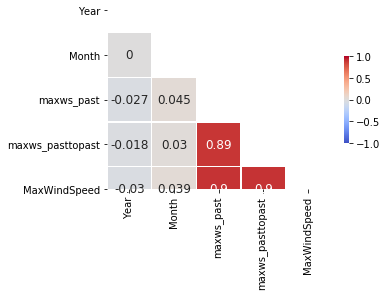

In [121]:
f, ax = plt.subplots(figsize=(5, 4)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [122]:
maxw=maxw.drop(['Year'],axis=1)

In [123]:
maxw.shape

(216, 4)

In [124]:
maxw=maxw.iloc[:,:].values

In [125]:
maxw

array([[ 1.  ,  4.07,  4.99,  5.08],
       [ 2.  ,  4.04,  4.85,  4.31],
       [ 3.  ,  5.69,  4.93,  5.04],
       [ 4.  ,  5.  ,  6.02,  5.22],
       [ 5.  ,  7.74,  7.13,  7.42],
       [ 6.  ,  9.72,  7.76,  8.02],
       [ 7.  , 10.02,  9.38,  9.52],
       [ 8.  ,  8.61,  8.11,  8.96],
       [ 9.  ,  4.46,  5.61,  5.59],
       [10.  ,  5.28,  3.33,  4.84],
       [11.  ,  4.82,  4.19,  4.55],
       [12.  ,  4.68,  5.18,  4.14],
       [ 1.  ,  5.08,  4.07,  4.72],
       [ 2.  ,  4.31,  4.04,  4.29],
       [ 3.  ,  5.04,  5.69,  4.65],
       [ 4.  ,  5.22,  5.  ,  5.01],
       [ 5.  ,  7.42,  7.74,  7.63],
       [ 6.  ,  8.02,  9.72,  8.7 ],
       [ 7.  ,  9.52, 10.02,  8.81],
       [ 8.  ,  8.96,  8.61,  8.52],
       [ 9.  ,  5.59,  4.46,  6.93],
       [10.  ,  4.84,  5.28,  4.28],
       [11.  ,  4.55,  4.82,  4.81],
       [12.  ,  4.14,  4.68,  4.77],
       [ 1.  ,  4.72,  5.08,  4.82],
       [ 2.  ,  4.29,  4.31,  4.38],
       [ 3.  ,  4.65,  5.04,  4.74],
 

In [126]:
X=maxw[:,:-1]
y=maxw[:,-1]

In [127]:
X

array([[ 1.  ,  4.07,  4.99],
       [ 2.  ,  4.04,  4.85],
       [ 3.  ,  5.69,  4.93],
       [ 4.  ,  5.  ,  6.02],
       [ 5.  ,  7.74,  7.13],
       [ 6.  ,  9.72,  7.76],
       [ 7.  , 10.02,  9.38],
       [ 8.  ,  8.61,  8.11],
       [ 9.  ,  4.46,  5.61],
       [10.  ,  5.28,  3.33],
       [11.  ,  4.82,  4.19],
       [12.  ,  4.68,  5.18],
       [ 1.  ,  5.08,  4.07],
       [ 2.  ,  4.31,  4.04],
       [ 3.  ,  5.04,  5.69],
       [ 4.  ,  5.22,  5.  ],
       [ 5.  ,  7.42,  7.74],
       [ 6.  ,  8.02,  9.72],
       [ 7.  ,  9.52, 10.02],
       [ 8.  ,  8.96,  8.61],
       [ 9.  ,  5.59,  4.46],
       [10.  ,  4.84,  5.28],
       [11.  ,  4.55,  4.82],
       [12.  ,  4.14,  4.68],
       [ 1.  ,  4.72,  5.08],
       [ 2.  ,  4.29,  4.31],
       [ 3.  ,  4.65,  5.04],
       [ 4.  ,  5.01,  5.22],
       [ 5.  ,  7.63,  7.42],
       [ 6.  ,  8.7 ,  8.02],
       [ 7.  ,  8.81,  9.52],
       [ 8.  ,  8.52,  8.96],
       [ 9.  ,  6.93,  5.59],
       [10

In [128]:
y

array([ 5.08,  4.31,  5.04,  5.22,  7.42,  8.02,  9.52,  8.96,  5.59,
        4.84,  4.55,  4.14,  4.72,  4.29,  4.65,  5.01,  7.63,  8.7 ,
        8.81,  8.52,  6.93,  4.28,  4.81,  4.77,  4.82,  4.38,  4.74,
        5.58,  6.62,  8.79,  7.81, 10.26,  4.95,  4.52,  4.96,  4.7 ,
        4.31,  4.81,  5.17,  4.86,  6.57,  8.54,  9.05,  8.4 ,  6.64,
        4.52,  5.14,  4.22,  4.73,  4.61,  5.13,  5.61,  6.68,  6.96,
       11.15,  9.79,  4.71,  4.69,  4.44,  4.74,  4.19,  4.96,  5.21,
        4.46,  7.16,  7.96,  8.86,  8.6 ,  6.17,  4.25,  4.94,  4.65,
        4.65,  4.47,  4.3 ,  5.09,  7.8 ,  9.47,  8.81,  7.71,  5.63,
        4.44,  5.22,  4.33,  4.9 ,  4.01,  4.57,  5.35,  6.98,  7.72,
       11.08,  7.4 ,  4.95,  4.74,  5.15,  4.4 ,  4.71,  4.63,  4.9 ,
        5.09,  7.16,  7.16,  8.56,  7.34,  5.48,  4.39,  4.67,  4.61,
        4.29,  4.93,  4.96,  4.86,  6.79,  9.78,  9.42,  8.73,  6.8 ,
        4.44,  5.45,  4.56,  4.66,  4.67,  4.95,  5.18,  7.43,  8.6 ,
        9.33,  9.13,

In [129]:
X.shape

(216, 3)

In [130]:
y.shape

(216,)

In [131]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [132]:
X_train,y_train=np.array(X_train),np.array(y_train)

### Linear Regressor

In [133]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [134]:
li=LinearRegression()

In [135]:
li.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
Lir_ypred= li.predict(X_test)
Lir_ypred

array([4.89981724, 9.88168548, 4.64999272, 4.83397693, 4.42969057,
       4.46705097, 5.20221526, 9.01154053, 8.80108676, 5.71511383,
       4.82005969, 8.51979788, 4.1937135 , 4.84453581, 8.63362414,
       4.84075134, 5.00673531, 7.3532495 , 7.95797963, 7.37987525,
       4.62441728, 7.54608   , 5.10546811, 4.60838451, 8.53779895,
       4.94452641, 5.01632942, 4.78518866, 5.58593976, 4.70795694,
       4.63695311, 5.14429225, 9.43677593, 4.42245671, 4.38552396,
       8.72999433, 8.29482974, 5.35953647, 4.67841891, 4.86153015,
       5.04207832, 4.76865844, 4.70669754, 5.34191243])

In [137]:
#print('Mean Absolute Error:',mean_absolute_error(y_test,Lir_ypred))
print('Mean squared Error:',mean_squared_error(y_test,Lir_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lir_ypred)))
#print('R2_Score:',r2_score(y_test,Lir_ypred))

Mean squared Error: 0.55552357117773
Root Mean Squared Error: 0.7453345364181979


In [138]:
linear_r2_score=r2_score(y_test,Lir_ypred)
linear_r2_score

0.8638301945764613

### Lasso Regressor

In [139]:
#Lasso Regressor
lass=Lasso(alpha=0.0001)
lass.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [140]:
Lass_ypred= lass.predict(X_test)

In [141]:
print('Mean squared Error:',mean_squared_error(y_test,Lass_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lass_ypred)))
print('R2_Score:',r2_score(y_test,Lass_ypred))

Mean squared Error: 0.5555599653111595
Root Mean Squared Error: 0.7453589506480481
R2_Score: 0.8638212736551453


In [142]:
lasso_r2_score=r2_score(y_test,Lass_ypred)
lasso_r2_score

0.8638212736551453

### Ridge Regressor

In [143]:
#RIdge
rid=Ridge(alpha=0.0001)
rid.fit(X_train,y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [144]:
rid_ypred= rid.predict(X_test)

In [145]:
print('Mean squared Error:',mean_squared_error(y_test,rid_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rid_ypred)))
#print('R2_Score:',r2_score(y_test,rid_ypred))

Mean squared Error: 0.5555236092475053
Root Mean Squared Error: 0.7453345619569143


In [146]:
ridge_r2_score=r2_score(y_test,rid_ypred)
ridge_r2_score

0.8638301852448069

### Decision Tree Regressor

In [147]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [148]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [149]:
dt_ypred= dt.predict(X_test)

In [150]:
print('Mean squared Error:',mean_squared_error(y_test,dt_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dt_ypred)))
#print('R2_Score:',r2_score(y_test,dt_ypred))

Mean squared Error: 1.4316749999999998
Root Mean Squared Error: 1.1965262220277497


In [151]:
decisiontree_r2_score=r2_score(y_test,dt_ypred)
decisiontree_r2_score

0.6490681650709405

### KNeighbour Regressor

In [152]:
from sklearn.neighbors import KNeighborsRegressor

kn=KNeighborsRegressor(n_neighbors=10)
kn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [153]:
kn1_pred=kn.predict(X_test)

In [154]:
print('Mean squared Error:',mean_squared_error(y_test,kn1_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,kn1_pred)))
#print('R2_Score:',r2_score(y_test,kn1_pred))

Mean squared Error: 0.45421668181818187
Root Mean Squared Error: 0.6739559939774865


In [155]:
kneighbour_r2_score=r2_score(y_test,kn1_pred)
kneighbour_r2_score

0.8886625151617208

### SVR Regressor

In [156]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [157]:
print('Mean squared Error:',mean_squared_error(y_test,svr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,svr_pred)))
#print('R2_Score:',r2_score(y_test,svr_pred))

Mean squared Error: 0.745840829005134
Root Mean Squared Error: 0.8636207668908467


In [158]:
svr_r2_score=r2_score(y_test,svr_pred)
svr_r2_score

0.8171796736774878

### Random Forest Regressor

In [159]:
from sklearn.ensemble import RandomForestRegressor

In [160]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);

In [161]:
rf_pred=rf.predict(X_test)

In [162]:
print('Mean squared Error:',mean_squared_error(y_test,rf_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('R2_Score:',r2_score(y_test,rf_pred))

Mean squared Error: 0.6797479168727306
Root Mean Squared Error: 0.8244682631082476
R2_Score: 0.8333803525539293


In [163]:
randomforest_r2_score=r2_score(y_test,rf_pred)
randomforest_r2_score

0.8333803525539293

### Bayesian Regressor

In [164]:
from sklearn.linear_model import BayesianRidge
br=BayesianRidge()
br.fit(X_train,y_train)
y_pred=br.predict(X_test)

In [165]:
print('Mean squared Error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
#print('R2_Score:',r2_score(y_test,y_pred))

Mean squared Error: 0.5568719461501375
Root Mean Squared Error: 0.7462385316707637


In [166]:
bayesian_r2_score=r2_score(y_test,y_pred)
bayesian_r2_score

0.8634996812244509

In [167]:
Regressors=['Linear','Lasso','Ridge','DecisionTree','KNeighbour','SVR','RandomForest','Bayesian']
R2_Score=[linear_r2_score,lasso_r2_score,ridge_r2_score,decisiontree_r2_score,kneighbour_r2_score,svr_r2_score,randomforest_r2_score,bayesian_r2_score]

No handles with labels found to put in legend.


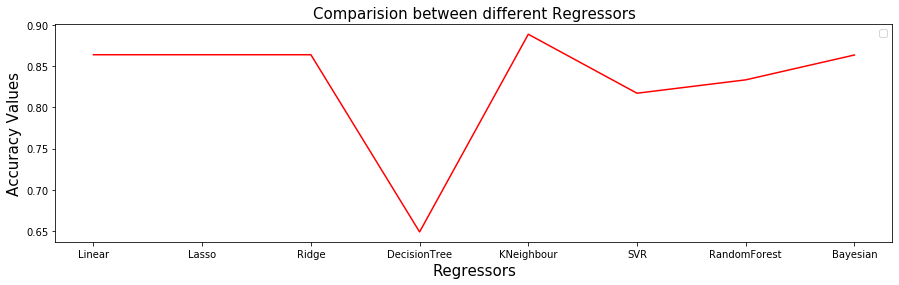

In [168]:
plt.figure(figsize=(15,4))
plt.plot(Regressors,R2_Score, color = 'Red')

plt.title('Comparision between different Regressors',fontsize=15)
plt.xlabel('Regressors',fontsize=15)
plt.ylabel('Accuracy Values',fontsize=15)
plt.legend()
plt.show()


# KNeighbour is best for Max Wind  with accuracy of 88.886% followed by Bayesian Rgressor with 86.3% 

In [169]:
maxw2020=pd.read_csv("C:/Users/Abhishek Wagh/Desktop/MTech_Project/Sugarcane/Phase1/csv/MaxWind/maxwind2020pred.csv")

In [170]:
maxw2020.drop(['Year'],axis=1,inplace=True)

In [171]:
maxw2020=maxw2020.iloc[:,:].values

In [172]:
maxw2020

array([[ 1.  ,  4.31,  3.93],
       [ 2.  ,  4.87,  4.11],
       [ 3.  ,  4.72,  4.21],
       [ 4.  ,  5.68,  4.89],
       [ 5.  ,  6.48,  6.16],
       [ 6.  ,  7.78,  7.88],
       [ 7.  , 10.36, 10.57],
       [ 8.  ,  7.8 , 10.2 ],
       [ 9.  ,  4.55,  5.46],
       [10.  ,  3.56,  4.46],
       [11.  ,  4.24,  4.48],
       [12.  ,  4.96,  4.64]])

In [173]:
maxw2020_pred=[]

In [174]:
maxw2020_pred=kn.predict(maxw2020)

In [175]:
maxw2020_pred

array([4.51 , 4.575, 4.863, 5.264, 6.944, 8.045, 9.281, 8.853, 5.193,
       4.454, 4.814, 4.647])

In [176]:
maxwind_data=pd.DataFrame(data=maxw2020_pred)
maxwind_data

,0
0,4.510
1,4.575
2,4.863
3,5.264
4,6.944
5,8.045
6,9.281
7,8.853
8,5.193
9,4.454


In [177]:
maxwind_data.to_csv(r"C:\Users\Abhishek Wagh\Desktop\MTech_Project\Sugarcane\Phase1\csv\MaxWind\2020maxwind.csv")